In [ ]:
import numpy as np
from numpy import histogram as hist



#Add the Filtering folder, to import the gauss_module.py file, where gaussderiv is defined (needed for dxdy_hist)
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
filteringpath = os.path.join(parentdir, 'Filtering')
sys.path.insert(0,filteringpath)
import gauss_module



#  compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
#  assume that image intensity varies between 0 and 255
#
#  img_gray - input image in grayscale format
#  num_bins - number of bins in the histogram
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    print(img_gray)


    return hists, bins



#  Compute the *joint* histogram for each color channel in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3
#
#  E.g. hists[0,9,5] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
#       - their B values fall in bin 5
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        
        #... (your code here)
        pass


    #Normalize the histogram such that its integral (sum) is equal 1
    #... (your code here)

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists



#  Compute the *joint* histogram for the R and G color channels in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2
#
#  E.g. hists[0,9] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    
    
    #... (your code here)


    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists




#  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
#  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
#  The histogram should be normalized so that sum of all values equals 1
#
#  img_gray - input gray value image
#  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
#
#  Note: you may use the function gaussderiv from the Filtering exercise (gauss_module.py)
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))


    #... (your code here)


    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists



def is_grayvalue_hist(hist_name):
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown distance: %s'%hist_name



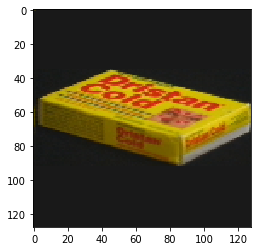

In [127]:
import numpy as np
from numpy import histogram as hist
import imageio
import matplotlib.pyplot as plt

path = r"C:\Users\RE-Giorgio\AML-lab1\Assignment\Identification\query"
img = imageio.imread(path + r"\obj1__40.png")
plt.imshow(img)

In [128]:
hist_, bins = hist(img, 10)
print(hist_)
print(bins)
#plt.hist(img, bins = bins)

[34788  4985  1311  1503  1302  1157  1342  1656   891   217]
[  0.   25.3  50.6  75.9 101.2 126.5 151.8 177.1 202.4 227.7 253. ]


In [124]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    import numpy as np
    
    flattened = [pix for dim in img_gray for pix in dim]
    min_interval = 0
    max_interval = 255
    
    bin_size = max_interval/num_bins
    bin_hist = {0:0}
    
    previous = 0
    for i in range(num_bins):
        bin_ = previous + bin_size
        bin_hist[bin_] = 0
        previous = bin_

    
    for pix in flattened:
        for bin_ in bin_hist:
            if bin_ - bin_size <= pix < bin_:
                bin_hist[bin_-bin_size] += 1

    hists = list(bin_hist.values())
    hists.pop()
    bins = list(bin_hist.keys())
    return [hists/np.sum(hists)], bins

In [125]:
normalized_hist(np.array(img, "float"), 10)

([array([0.16461961, 0.38525757, 0.14917207, 0.02476291, 0.03780803,
         0.04858888, 0.05773008, 0.06524964, 0.05955591, 0.0072553 ])],
 [0, 25.5, 51.0, 76.5, 102.0, 127.5, 153.0, 178.5, 204.0, 229.5, 255.0])